# Разведочный анализ данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objs as go
from matplotlib import pyplot as plt
from plotly.subplots import make_subplots
%matplotlib inline
pd.options.display.max_columns = 50

In [2]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

Загрузим входные данные

In [3]:
%%time
flights = pd.read_csv('df_2015.csv', low_memory=False)

CPU times: user 11.6 s, sys: 5.38 s, total: 17 s
Wall time: 17.5 s


In [4]:
airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')

Посмотрим на основную таблицу

In [5]:
flights.head()

YEAR  MONTH  DAY_OF_MONTH  DAY_OF_WEEK OP_CARRIER TAIL_NUM  \
0  2015      4            23            4         AA   N3FJAA   
1  2015      4            24            5         AA   N3BAAA   
2  2015      4            25            6         AA   N3CUAA   
3  2015      4            26            7         AA   N3HKAA   
4  2015      4            27            1         AA   N3DMAA   

   OP_CARRIER_FL_NUM ORIGIN ORIGIN_CITY_NAME DEST DEST_CITY_NAME  \
0                165    ORD          Chicago  PHX        Phoenix   
1                165    ORD          Chicago  PHX        Phoenix   
2                165    ORD          Chicago  PHX        Phoenix   
3                165    ORD          Chicago  PHX        Phoenix   
4                165    ORD          Chicago  PHX        Phoenix   

   CRS_DEP_TIME  DEP_DELAY  DEP_DELAY_GROUP  TAXI_OUT  WHEELS_OFF  WHEELS_ON  \
0          1210       -8.0             -1.0      15.0      1217.0     1356.0   
1          1210        4.0              0.0      19.0      1233.0     1417.0   
2          1210       44.0              2.0      24.0      1318.0     1441.0   
3          1210       -5.0             -1.0      11.0      1216.0     1326.0   
4          1210        9.0              0.0      11.0      1230.0     1328.0   

   TAXI_IN  CRS_ARR_TIME  ARR_DELAY  ARR_DELAY_GROUP  CANCELLED  \
0      6.0          1414      -12.0             -1.0        0.0   
1     12.0          1414       15.0              1.0        0.0   
2      4.0          1414       31.0              2.0        0.0   
3      4.0          1414      -44.0             -2.0        0.0   
4     22.0          1414      -24.0             -2.0        0.0   

  CANCELLATION_CODE  DIVERTED  ACTUAL_ELAPSED_TIME  AIR_TIME  FLIGHTS  \
0               NaN       0.0                240.0     219.0      1.0   
1               NaN       0.0                255.0     224.0      1.0   
2               NaN       0.0                231.0     203.0      1.0   
3               NaN       0.0                205.0     190.0      1.0   
4               NaN       0.0                211.0     178.0      1.0   

   DISTANCE  CARRIER_DELAY  WEATHER_DELAY  NAS_DELAY  SECURITY_DELAY  \
0    1440.0            NaN            NaN        NaN             NaN   
1    1440.0            0.0            0.0       15.0             0.0   
2    1440.0           31.0            0.0        0.0             0.0   
3    1440.0            NaN            NaN        NaN             NaN   
4    1440.0            NaN            NaN        NaN             NaN   

   LATE_AIRCRAFT_DELAY  FIRST_DEP_TIME  TOTAL_ADD_GTIME  LONGEST_ADD_GTIME  
0                  NaN             NaN              NaN                NaN  
1                  0.0             NaN              NaN                NaN  
2                  0.0             NaN              NaN                NaN  
3                  NaN             NaN              NaN                NaN  
4                  NaN             NaN              NaN                NaN

Посмотрим на заполненность данных

In [6]:
missing_values_table(flights)

Your selected dataframe has 36 columns.
There are 20 columns that have missing values.


Missing Values  % of Total Values
LONGEST_ADD_GTIME           5782342               99.4
TOTAL_ADD_GTIME             5782342               99.4
FIRST_DEP_TIME              5782342               99.4
CANCELLATION_CODE           5729195               98.5
LATE_AIRCRAFT_DELAY         4755640               81.7
SECURITY_DELAY              4755640               81.7
NAS_DELAY                   4755640               81.7
WEATHER_DELAY               4755640               81.7
CARRIER_DELAY               4755640               81.7
AIR_TIME                     105071                1.8
ACTUAL_ELAPSED_TIME          105071                1.8
ARR_DELAY_GROUP              105071                1.8
ARR_DELAY                    105071                1.8
TAXI_IN                       92513                1.6
WHEELS_ON                     92513                1.6
WHEELS_OFF                    89047                1.5
TAXI_OUT                      89047                1.5
DEP_DELAY                     86153                1.5
DEP_DELAY_GROUP               86153                1.5
TAIL_NUM                      14721                0.3

Видим, что присутствует достаточно много пустых значений. Самый простой ввариант борьбы с ними - удалить строки. Другой вариант - заполнить самим

Посмотрим на другие таблицы

In [7]:
airports

IATA_CODE                              AIRPORT  \
0         ABE  Lehigh Valley International Airport   
1         ABI             Abilene Regional Airport   
2         ABQ    Albuquerque International Sunport   
3         ABR            Aberdeen Regional Airport   
4         ABY   Southwest Georgia Regional Airport   
..        ...                                  ...   
317       WRG                     Wrangell Airport   
318       WYS               Westerly State Airport   
319       XNA  Northwest Arkansas Regional Airport   
320       YAK                      Yakutat Airport   
321       YUM           Yuma International Airport   

                               CITY STATE COUNTRY  LATITUDE  LONGITUDE  
0                         Allentown    PA     USA  40.65236  -75.44040  
1                           Abilene    TX     USA  32.41132  -99.68190  
2                       Albuquerque    NM     USA  35.04022 -106.60919  
3                          Aberdeen    SD     USA  45.44906  -98.42183  
4                            Albany    GA     USA  31.53552  -84.19447  
..                              ...   ...     ...       ...        ...  
317                        Wrangell    AK     USA  56.48433 -132.36982  
318                West Yellowstone    MT     USA  44.68840 -111.11764  
319  Fayetteville/Springdale/Rogers    AR     USA  36.28187  -94.30681  
320                         Yakutat    AK     USA  59.50336 -139.66023  
321                            Yuma    AZ     USA  32.65658 -114.60597  

[322 rows x 7 columns]

In [8]:
airlines

IATA_CODE                       AIRLINE
0         UA         United Air Lines Inc.
1         AA        American Airlines Inc.
2         US               US Airways Inc.
3         F9        Frontier Airlines Inc.
4         B6               JetBlue Airways
5         OO         Skywest Airlines Inc.
6         AS          Alaska Airlines Inc.
7         NK              Spirit Air Lines
8         WN        Southwest Airlines Co.
9         DL          Delta Air Lines Inc.
10        EV   Atlantic Southeast Airlines
11        HA        Hawaiian Airlines Inc.
12        MQ  American Eagle Airlines Inc.
13        VX                Virgin America

## Попробуем графически посмотреть на данные

### Причины задержек авиарейса

In [52]:
dff = flights[['OP_CARRIER', 'NAS_DELAY', 'WEATHER_DELAY', 'CARRIER_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']]

In [25]:
%%time
dff = dff.groupby('OP_CARRIER').mean()

CPU times: user 502 ms, sys: 310 ms, total: 812 ms
Wall time: 809 ms


In [11]:
abbr_companies = airlines.set_index('IATA_CODE')['AIRLINE'].to_dict()

In [12]:
dff.index = dff.index.map(abbr_companies)

In [45]:
trace1 = go.Bar(
    x=dff.index,
    y=dff.CARRIER_DELAY,
    name = 'Carrier',
    marker = dict(
        color = 'skyblue'
    )
)

trace2 = go.Bar(
    x=dff.index,
    y=dff.WEATHER_DELAY,
    name='Weather',
    marker=dict(
        color = 'hotpink'
    )
)

trace3 = go.Bar(
    x=dff.index,
    y=dff.NAS_DELAY,
    name='National Air System',
    marker=dict(
        color = 'khaki'
    )
)

trace4 = go.Bar(
    x=dff.index,
    y=dff.LATE_AIRCRAFT_DELAY,
    name='Late Aircraft',
    marker=dict(
        color = 'salmon'
    )
)

trace5 = go.Bar(
    x=dff.index,
    y=dff.SECURITY_DELAY,
    name='Security',
    marker=dict(
        color = 'tan'
    )
)

data = [trace1, trace2, trace3, trace4] #trace5 слишком мал
layout = go.Layout(
    title='DEPARTURE DELAY REASON', 
    yaxis = dict(title = 'Средняя задержка в минутах'),
    width=1000,
    height=500
)

fig = go.Figure(data=data, layout=layout, )

fig.update_layout(
    font=dict(
        size=14,
    )
)

fig.show()

In [15]:
fig.write_image("fig1.svg")

### Начнём с распределения авиалиний в таблице

In [54]:
dff = flights['OP_CARRIER'].value_counts()
#label = [airlines[airlines.IATA_CODE == i].AIRLINE.values[0] for i in dff.index ]
size = dff.values

trace = go.Pie(labels=dff.index, values=size, hole = .2)

data = [trace]
layout = go.Layout(
    title='Airline Distribution',
    width=1000,
    height=600,
)

fig = go.Figure(data=data, layout=layout)
fig.update_layout(
    font=dict(
        size=20,
    )
)
fig.show()

### Рассмотрим теперь распределение полётов от месяца

In [10]:
dff = flights.MONTH.value_counts().to_frame().reset_index().sort_values(by='index')
dff.columns = ['month', 'flight_num']
month = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',
            6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
dff.month = dff.month.map(month)

trace = go.Bar(
    x=dff.month,
    y=dff.flight_num,
    marker=dict(
        color = dff.flight_num,
        showscale=True)
)

data = [trace]
layout = go.Layout(
    title='Counts of Flights (monthly)', 
    yaxis = dict(title = 'Counts of Flights')
)

fig = go.Figure(data=data, layout=layout)
fig.show()

Замечаем, что в таблице отсутствуют рейсы, совершённые в октябре. Как оказалось, в таблице неверно закодированы кода аэропортов. Вместо трёхбуквенного кода вводили пятизначный цифровой. Это нужно исправить

In [10]:
%%script False
df_aircode1 = pd.read_csv('L_AIRPORT.csv')
df_aircode2 = pd.read_csv('L_AIRPORT_ID.csv')
df_aircodes = pd.merge(df_aircode1,df_aircode2,on='Description')
aircode_dict = dict(zip(df_aircodes['Code_y'].astype(str),df_aircodes['Code_x']))


# Make sure all Origin and departing airports are strings
flights['ORIGIN_AIRPORT'] = flights['ORIGIN_AIRPORT'].values.astype(str)
flights['DESTINATION_AIRPORT'] = flights['DESTINATION_AIRPORT'].values.astype(str)

N_flights = len(flights)
for i in range(N_flights):
    if i % 100000 == 0:
        print(i)
    if len(flights['ORIGIN_AIRPORT'][i]) != 3:
        to_replace = flights['ORIGIN_AIRPORT'][i]
        value = aircode_dict[flights['ORIGIN_AIRPORT'][i]]
        flights = flights.replace(to_replace, value)
        #print('replaced',to_replace,'with',value)
    elif len(flights['DESTINATION_AIRPORT'][i]) != 3:
        to_replace = flights['DESTINATION_AIRPORT'][i]
        value = aircode_dict[flights['DESTINATION_AIRPORT'][i]]
        flights = flights.replace(to_replace, value)
        #print('replaced',to_replace,'with',value)

Couldn't find program: 'False'


Сохраним результаты, чтобы не повторять преобразование в следующий раз

In [11]:
%%script False
flights.to_csv('flights_correct.csv', index=False)

Couldn't find program: 'False'


In [13]:
%%time
flights = pd.read_csv('flights_correct.csv')

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.44 µs


Убедимся, что всё сработало

In [56]:
dff = flights.MONTH.value_counts().to_frame().reset_index().sort_values(by='index')
dff.columns = ['month', 'flight_num']
month = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',
            6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
dff.month = dff.month.map(month)

trace = go.Bar(
    x=dff.month,
    y=dff.flight_num,
    marker=dict(
        color = dff.flight_num,
        showscale=True)
)

data = [trace]
layout = go.Layout(
    title='Counts of Flights (monthly)', 
    yaxis = dict(title = 'Counts of Flights')
)

fig = go.Figure(data=data, layout=layout)
fig.show()

В феврале было совершено относительно немного вылетов

### Посмотрим на причины отменённых рейсов в каждом месяце

In [59]:
cancel_reason = {'A': 'Carrier', 'B': 'Weather', 'C': 'National Air System', 'D': 'Security'}
#flights.CANCELLATION_REASON = flights.CANCELLATION_REASON.map(cancel_reason)

dff = flights[flights.CANCELLATION_CODE == 'A'].MONTH.value_counts()
dff = dff.sort_index()
dff.index = dff.index.map(month)
trace1 = go.Bar(
    x=dff.index,
    y=dff.values,
    name = 'Carrier',
    marker = dict(
        color = 'aqua'
    )
)

dff = flights[flights.CANCELLATION_CODE == 'B'].MONTH.value_counts()
dff = dff.sort_index()
dff.index = dff.index.map(month)
trace2 = go.Bar(
    x=dff.index,
    y=dff.values,
    name='Weather',
    marker=dict(
        color = 'pink'
    )
)

dff = flights[flights.CANCELLATION_CODE == 'C'].MONTH.value_counts()
dff = dff.sort_index()
dff.index = dff.index.map(month)
trace3 = go.Bar(
    x=dff.index,
    y=dff.values,
    name='National Air System',
    marker=dict(
        color = 'yellow'
    )
)

data = [trace1,trace2, trace3]
layout = go.Layout(
    title='CANCELLATION REASON', 
    yaxis = dict(title = 'Количество'),
    width=1500,
    height=700,
)

fig = go.Figure(data=data, layout=layout)
fig.update_layout(
    font=dict(
        size=24,
    )
)
fig.show()

Security не рассматривали, так как эта причина встречается крайне мало. В итоге, главной причиной отмены рейсов зимой является погода

### Посмотрим на распределение городов вылета и назначения

In [12]:
# Для удобства сделаем слияние исходной таблицы и городов
flights = pd.merge(flights,airports[['IATA_CODE','AIRPORT','CITY']], left_on='ORIGIN', right_on = 'IATA_CODE')
flights = flights.drop(['IATA_CODE'], axis=1)
flights = pd.merge(flights,airports[['IATA_CODE','AIRPORT','CITY']], left_on='DEST', right_on = 'IATA_CODE')
flights = flights.drop(['IATA_CODE'], axis=1)

origin_city = flights.CITY_x.value_counts()[:17]
destination_city = flights.CITY_y.value_counts()[:17]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=origin_city.index, values=origin_city.values, name="Origin City"),
              1, 1)
fig.add_trace(go.Pie(labels=destination_city.index, values=destination_city.values, name="Dest City"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4)

fig.update_layout(
    title_text="Distribution of Origin and Destination Cities",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Origin', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Destination', x=0.85, y=0.5, font_size=20, showarrow=False)])
fig.show()
flights.drop(['AIRPORT_x', 'AIRPORT_y', 'CITY_x', 'CITY_y'], axis=1, inplace=True)

Замечаем, что города, имеющие наибольшее число вылетов, также имеют и наибольшее число посадок

### Посмотрим на географическое положение этих городов

In [13]:
#[airports[airports.IATA_CODE == i] for i in flights.ORIGIN_AIRPORT]
dff = flights['ORIGIN'].value_counts()
latitude = [airports[airports.IATA_CODE == i].LATITUDE.values[0] for i in dff.index]
longitude = [airports[airports.IATA_CODE == i].LONGITUDE.values[0] for i in dff.index]
label = [airports[airports.IATA_CODE == i].CITY.values[0] for i in dff.index ]
counts = dff.values

In [14]:
fig = go.Figure()
fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = longitude,
        lat = latitude,
        text = label,
        marker = dict(
            size = counts/500,
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        )))
fig.update_layout(
        title_text = '2015 US Origin city airlines',
        showlegend = False,
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

На север страны приходтся крайне мало авиарейсов, в отличии от восточного побережья

### Посмотрим количество рейсов в зависимости от дня недели

In [15]:
dff = flights.DAY_OF_WEEK.value_counts().to_frame().reset_index().sort_values(by='index')
dff.columns = ['day', 'flight_num']
day = {7: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu',
            5: 'Fri', 6: 'Sat'}
dff.day = dff.day.map(day)

trace = go.Bar(
    x=dff.day,
    y=dff.flight_num,
    marker=dict(
        color = dff.flight_num,
        showscale=True)
)

data = [trace]
layout = go.Layout(
    title='Counts of Flights (daily)', 
    yaxis = dict(title = 'Counts of Flights')
)

fig = go.Figure(data=data, layout=layout)
fig.show()

### Посмотрим на распределение задержек в зависимости от месяца

In [16]:
df = flights.MONTH.to_frame()
df['dep_plus'] = np.where(flights.DEP_DELAY>0,1,0)
df['dep_minus'] = np.where(flights.DEP_DELAY<0,1,0)
df['arr_plus'] = np.where(flights.ARR_DELAY>0,1,0)
df['arr_minus'] = np.where(flights.ARR_DELAY<0,1,0)

In [24]:
dff = df.groupby('MONTH').dep_plus.mean().round(2) # среднее число задержек в каждом месяце
dff.index = dff.index.map(month)
trace1 = go.Bar(
    x=dff.index,
    y=dff.values,
    name = 'Departure delay > 0',
    marker = dict(
        color = 'aqua'
    )
)

dff = df.groupby('MONTH').arr_plus.mean().round(2) # среднее число задержек в каждом месяце
dff.index = dff.index.map(month)
trace2 = go.Bar(
    x=dff.index,
    y=dff.values,
    name='Arrival delay > 0',
    marker=dict(
        color = 'pink'
    )
)

data = [trace1,trace2]
layout = go.Layout(
    title='% Delay (Months)', 
    yaxis = dict(title = '%')
)

fig = go.Figure(data=data, layout=layout)
fig.show()

Наибольшее число задержек рейса как отправленни так и в прибытии приходится на июнь. Меньше всего - на сентябрь

In [25]:
dff = df.groupby('MONTH').dep_minus.mean().round(2) # среднее число задержек в каждом месяце
dff.index = dff.index.map(month)
trace1 = go.Bar(
    x=dff.index,
    y=dff.values,
    name = 'Departure delay < 0',
    marker = dict(
        color = 'aqua'
    )
)

dff = df.groupby('MONTH').arr_minus.mean().round(2) # среднее число задержек в каждом месяце
dff.index = dff.index.map(month)
trace2 = go.Bar(
    x=dff.index,
    y=dff.values,
    name='Arrival delay < 0',
    marker=dict(
        color = 'pink'
    )
)

data = [trace1,trace2]
layout = go.Layout(
    title='% Delay (Months)', 
    yaxis = dict(title = '%')
)

fig = go.Figure(data=data, layout=layout)
fig.show()

Здесь представлены результаты, когда рейс оправлялся или прибывал раньше, чем было запланировано. Рекордсмен - сентябрь

### Посмотрим на распределение задержек вылета в зависимости от числа месяца

Выберем конкретный месяц и аэропорт отправления

Text(0.5, 1.0, 'Departure delay of april 2015')

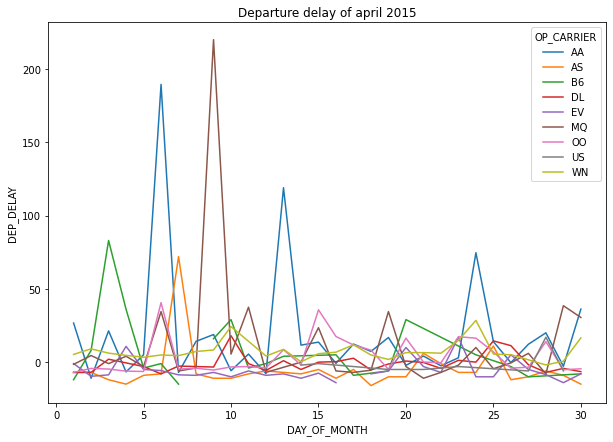

In [41]:
df = flights[flights['MONTH'] == 4].copy()
delays = df.groupby(['OP_CARRIER', 'ORIGIN', 'DAY_OF_MONTH']).DEP_DELAY.mean().to_frame().reset_index()
#tmp = delays[(delays['OP_CARRIER'] == 'AA') & (delays['ORIGIN'] == 'ABQ')].copy()
plt.figure(figsize=(10,7))
sns.lineplot(x=delays[delays['ORIGIN'] == 'ABQ'].DAY_OF_MONTH, 
             y=delays[delays['ORIGIN'] == 'ABQ'].DEP_DELAY,
             hue=delays[delays['ORIGIN'] == 'ABQ'].OP_CARRIER)
plt.title('Departure delay of april 2015')

Text(0.5, 1.0, 'Departure delay of april 2015')

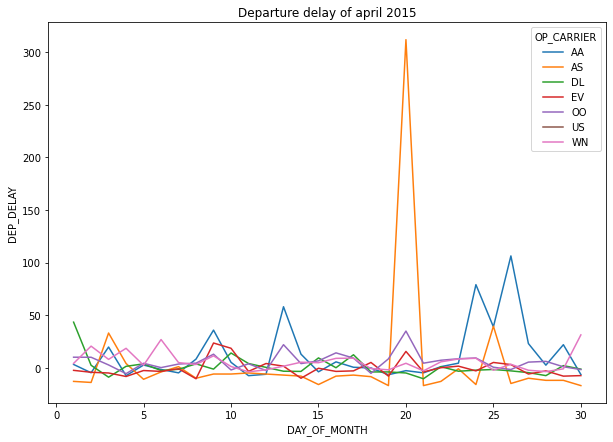

In [42]:
plt.figure(figsize=(10,7))
sns.lineplot(x=delays[delays['ORIGIN'] == 'TUS'].DAY_OF_MONTH, 
             y=delays[delays['ORIGIN'] == 'TUS'].DEP_DELAY,
             hue=delays[delays['ORIGIN'] == 'TUS'].OP_CARRIER)
plt.title('Departure delay of april 2015')

#### Сравним с предыдущим годом

In [38]:
%%time
df_2014 = pd.read_csv('df_2014.csv')

CPU times: user 15.6 s, sys: 3.44 s, total: 19.1 s
Wall time: 19.3 s


Text(0.5, 1.0, 'Departure delay of april 2014')

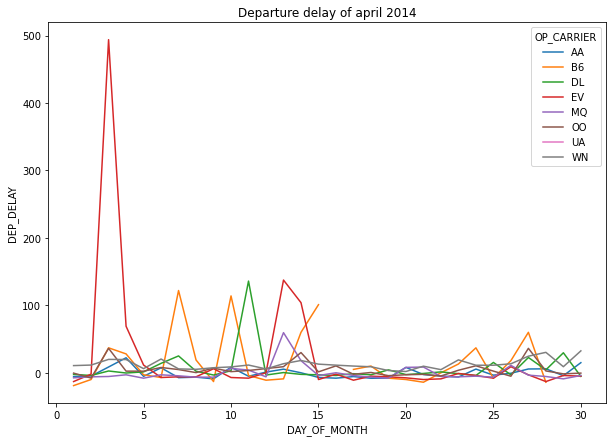

In [43]:
df = df_2014[df_2014['MONTH'] == 4].copy()
delays = df.groupby(['OP_CARRIER', 'ORIGIN', 'DAY_OF_MONTH']).DEP_DELAY.mean().to_frame().reset_index()
#tmp = delays[(delays['OP_CARRIER'] == 'AA') & (delays['ORIGIN'] == 'ABQ')].copy()
plt.figure(figsize=(10,7))
sns.lineplot(x=delays[delays['ORIGIN'] == 'ABQ'].DAY_OF_MONTH, 
             y=delays[delays['ORIGIN'] == 'ABQ'].DEP_DELAY,
             hue=delays[delays['ORIGIN'] == 'ABQ'].OP_CARRIER)
plt.title('Departure delay of april 2014')

Text(0.5, 1.0, 'Departure delay of april 2014')

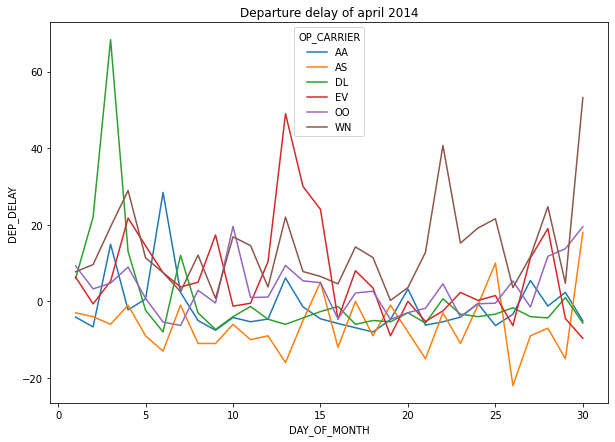

In [44]:
plt.figure(figsize=(10,7))
sns.lineplot(x=delays[delays['ORIGIN'] == 'TUS'].DAY_OF_MONTH, 
             y=delays[delays['ORIGIN'] == 'TUS'].DEP_DELAY,
             hue=delays[delays['ORIGIN'] == 'TUS'].OP_CARRIER)
plt.title('Departure delay of april 2014')

Как видим, общих закономерностей за 2 года обнаружить не удалось

### Посмотрим на распределение задержек вылета в зависимости от дня недели

<AxesSubplot:xlabel='DAY_OF_WEEK', ylabel='DEP_DELAY'>

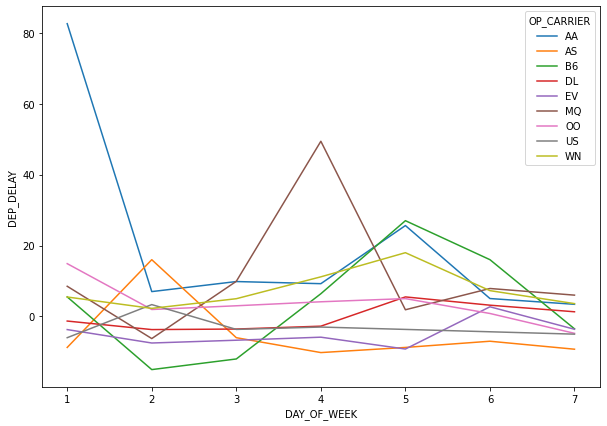

In [33]:
df = flights[flights['MONTH'] == 4].copy()
delays = df.groupby(['OP_CARRIER', 'ORIGIN', 'DAY_OF_WEEK']).DEP_DELAY.mean().to_frame().reset_index()
plt.figure(figsize=(10,7))
sns.lineplot(x=delays[delays['ORIGIN'] == 'ABQ'].DAY_OF_WEEK, 
             y=delays[delays['ORIGIN'] == 'ABQ'].DEP_DELAY,
             hue=delays[delays['ORIGIN'] == 'ABQ'].OP_CARRIER)

<AxesSubplot:xlabel='DAY_OF_WEEK', ylabel='DEP_DELAY'>

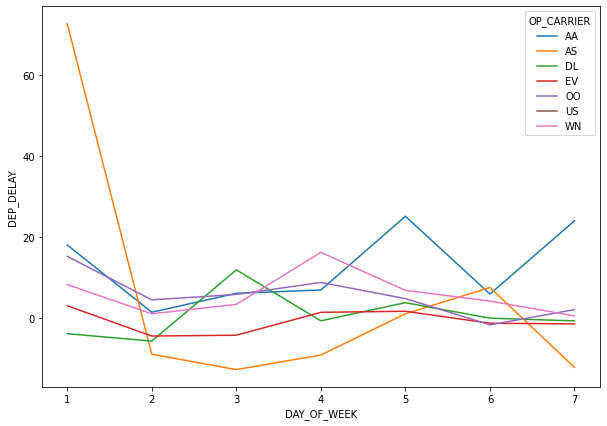

In [35]:
plt.figure(figsize=(10,7))
sns.lineplot(x=delays[delays['ORIGIN'] == 'TUS'].DAY_OF_WEEK, 
             y=delays[delays['ORIGIN'] == 'TUS'].DEP_DELAY,
             hue=delays[delays['ORIGIN'] == 'TUS'].OP_CARRIER)

#### Сравним с предыдущим годом

<AxesSubplot:xlabel='DAY_OF_WEEK', ylabel='DEP_DELAY'>

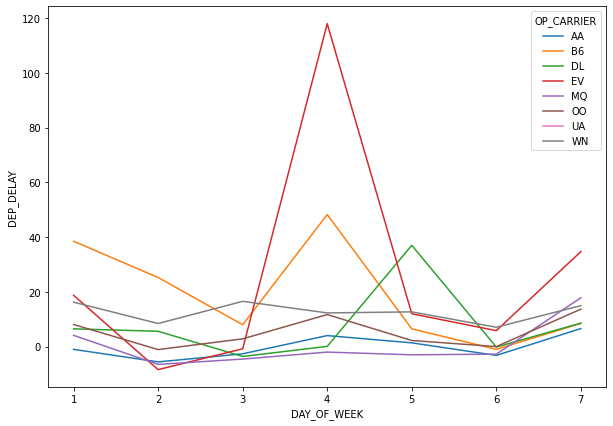

In [45]:
df = df_2014[df_2014['MONTH'] == 4].copy()
delays = df.groupby(['OP_CARRIER', 'ORIGIN', 'DAY_OF_WEEK']).DEP_DELAY.mean().to_frame().reset_index()
plt.figure(figsize=(10,7))
sns.lineplot(x=delays[delays['ORIGIN'] == 'ABQ'].DAY_OF_WEEK, 
             y=delays[delays['ORIGIN'] == 'ABQ'].DEP_DELAY,
             hue=delays[delays['ORIGIN'] == 'ABQ'].OP_CARRIER)

<AxesSubplot:xlabel='DAY_OF_WEEK', ylabel='DEP_DELAY'>

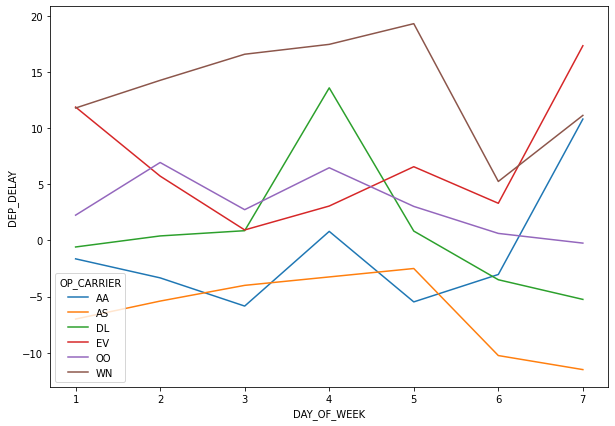

In [46]:
plt.figure(figsize=(10,7))
sns.lineplot(x=delays[delays['ORIGIN'] == 'TUS'].DAY_OF_WEEK, 
             y=delays[delays['ORIGIN'] == 'TUS'].DEP_DELAY,
             hue=delays[delays['ORIGIN'] == 'TUS'].OP_CARRIER)

Явных зависимостей также не обнаружено, но выглядит уже лучше, чем группировка по дню месяца

### Посмотрим на распределение задержек вылета в зависимости от месяца

<AxesSubplot:xlabel='MONTH', ylabel='DEP_DELAY'>

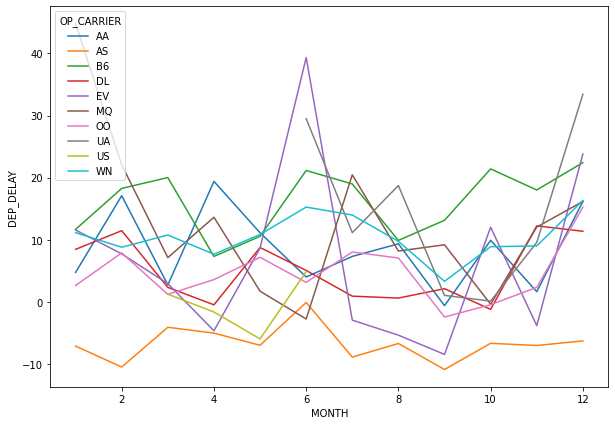

In [49]:
delays = flights.groupby(['OP_CARRIER', 'ORIGIN', 'MONTH']).DEP_DELAY.mean().to_frame().reset_index()
plt.figure(figsize=(10,7))
sns.lineplot(x=delays[delays['ORIGIN'] == 'ABQ'].MONTH, 
             y=delays[delays['ORIGIN'] == 'ABQ'].DEP_DELAY,
             hue=delays[delays['ORIGIN'] == 'ABQ'].OP_CARRIER)

<AxesSubplot:xlabel='MONTH', ylabel='DEP_DELAY'>

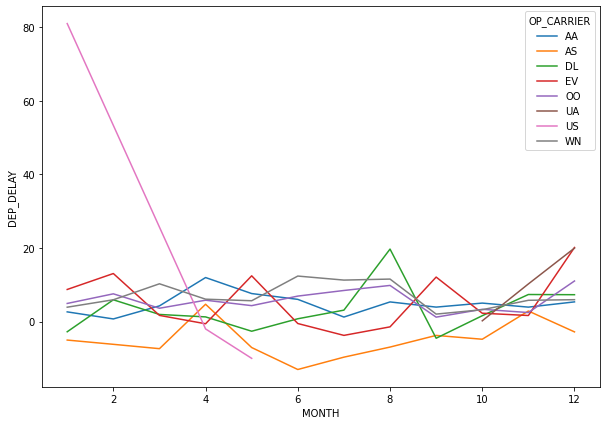

In [50]:
plt.figure(figsize=(10,7))
sns.lineplot(x=delays[delays['ORIGIN'] == 'TUS'].MONTH, 
             y=delays[delays['ORIGIN'] == 'TUS'].DEP_DELAY,
             hue=delays[delays['ORIGIN'] == 'TUS'].OP_CARRIER)

#### Сравним с предыдущим годом

<AxesSubplot:xlabel='MONTH', ylabel='DEP_DELAY'>

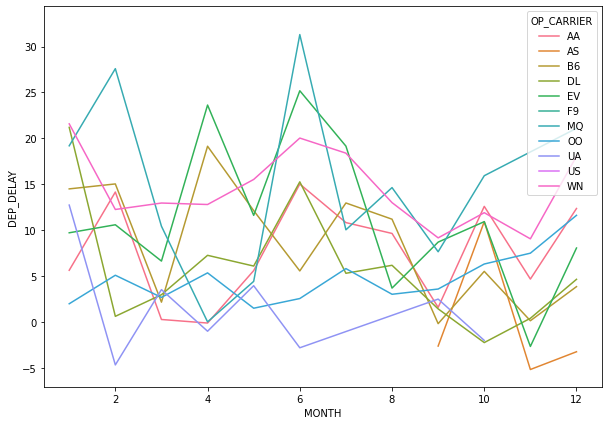

In [51]:
delays = df_2014.groupby(['OP_CARRIER', 'ORIGIN', 'MONTH']).DEP_DELAY.mean().to_frame().reset_index()
plt.figure(figsize=(10,7))
sns.lineplot(x=delays[delays['ORIGIN'] == 'ABQ'].MONTH, 
             y=delays[delays['ORIGIN'] == 'ABQ'].DEP_DELAY,
             hue=delays[delays['ORIGIN'] == 'ABQ'].OP_CARRIER)

<AxesSubplot:xlabel='MONTH', ylabel='DEP_DELAY'>

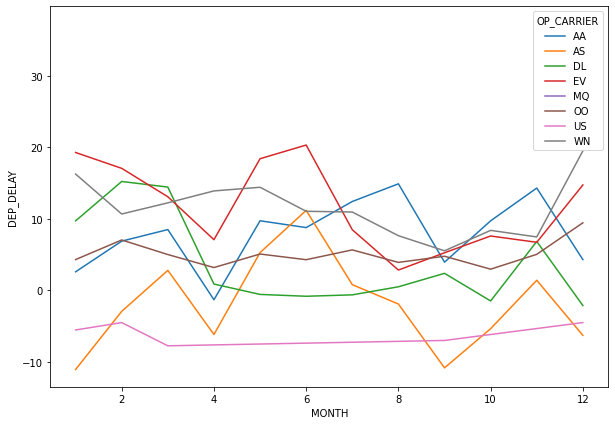

In [52]:
plt.figure(figsize=(10,7))
sns.lineplot(x=delays[delays['ORIGIN'] == 'TUS'].MONTH, 
             y=delays[delays['ORIGIN'] == 'TUS'].DEP_DELAY,
             hue=delays[delays['ORIGIN'] == 'TUS'].OP_CARRIER)

В данном варианте тенденции всё же можно проследить

### Посмотрим на распределение времени на земле каждой авиакомпании

<AxesSubplot:xlabel='WHEELS_ON', ylabel='Density'>

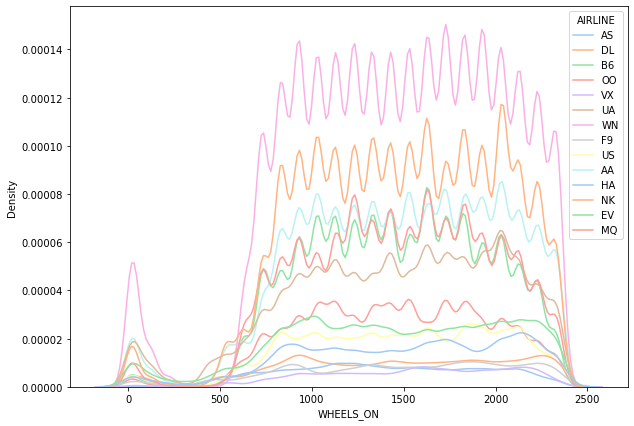

In [23]:
plt.figure(figsize=(10,7))
sns.kdeplot(flights.WHEELS_ON, hue=flights.OP_CARRIER, palette='pastel')

<AxesSubplot:xlabel='WHEELS_OFF', ylabel='Density'>

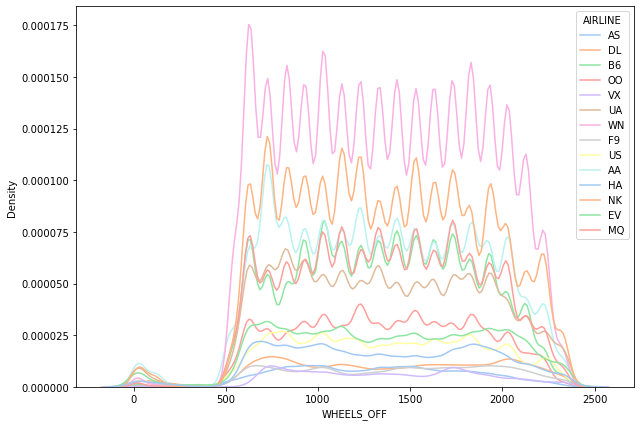

In [24]:
plt.figure(figsize=(10,7))
sns.kdeplot(flights.WHEELS_OFF, hue=flights.OP_CARRIER, palette='pastel')

<AxesSubplot:xlabel='WHEELS_ON', ylabel='DEPARTURE_DELAY'>

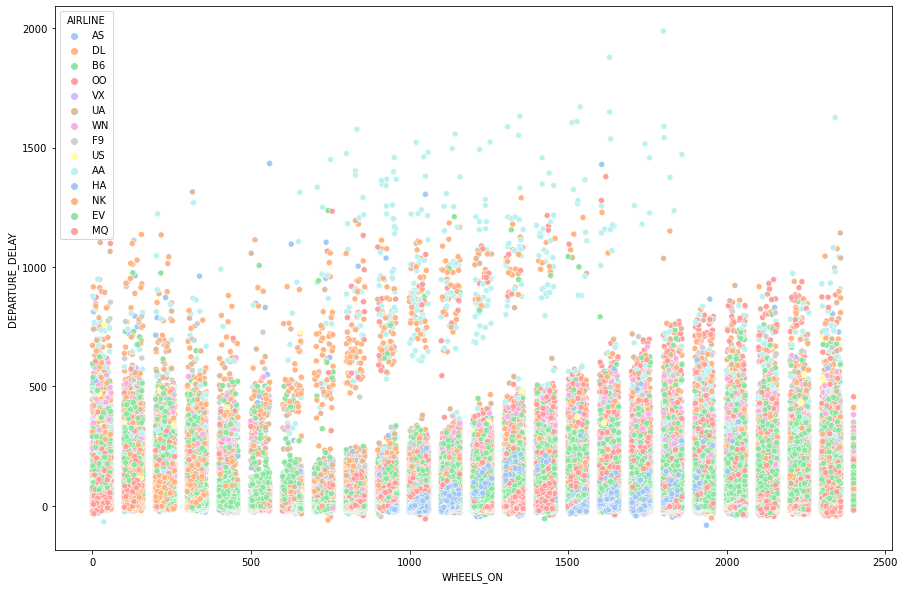

In [25]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=flights.WHEELS_ON, y=flights.DEP_DELAY, hue=flights.OP_CARRIER, palette='pastel')

<AxesSubplot:xlabel='WHEELS_OFF', ylabel='DEPARTURE_DELAY'>

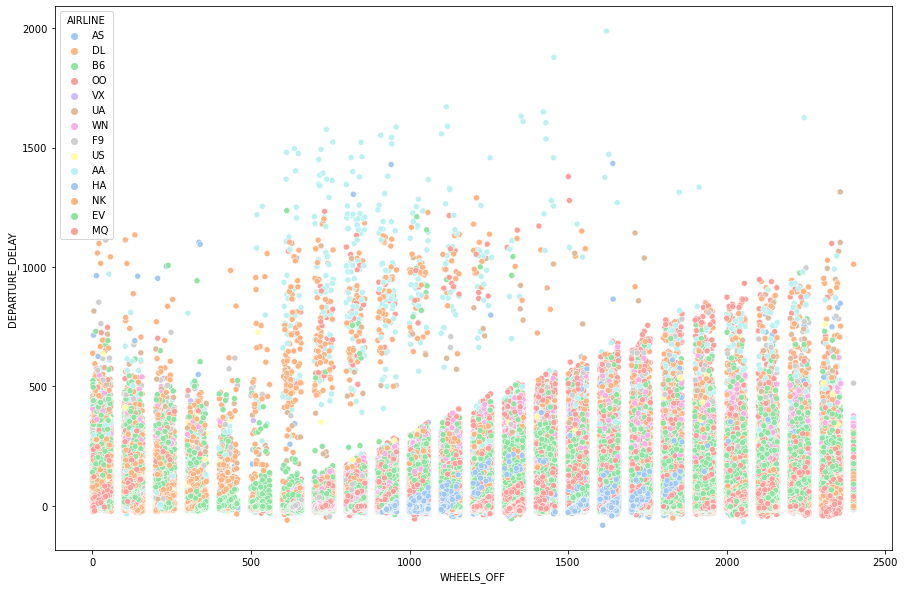

In [26]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=flights.WHEELS_OFF, y=flights.DEP_DELAY, hue=flights.OP_CARRIER, palette='pastel')

### Посмотрим на распределение задержек выруливания каждой авиакомпании

<AxesSubplot:xlabel='TAXI_IN', ylabel='Density'>

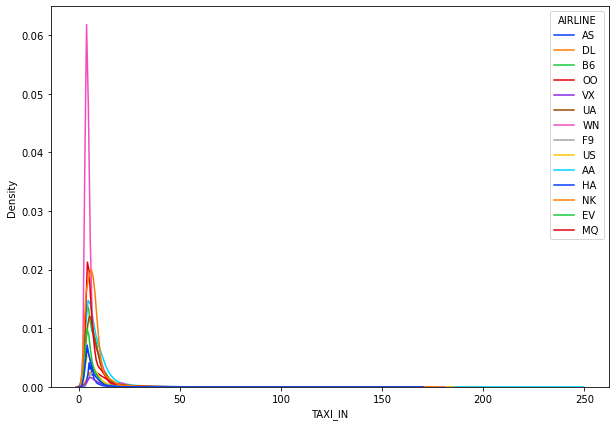

In [27]:
plt.figure(figsize=(10,7))
sns.kdeplot(flights.TAXI_IN, hue=flights.OP_CARRIER, palette='bright')

<AxesSubplot:xlabel='TAXI_IN', ylabel='Density'>

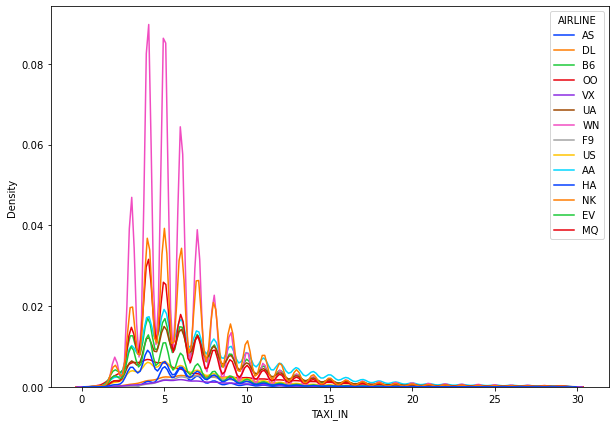

In [28]:
plt.figure(figsize=(10,7))
sns.kdeplot(flights[flights.TAXI_IN < 30].TAXI_IN, hue=flights.OP_CARRIER, palette='bright')

<AxesSubplot:xlabel='TAXI_OUT', ylabel='Density'>

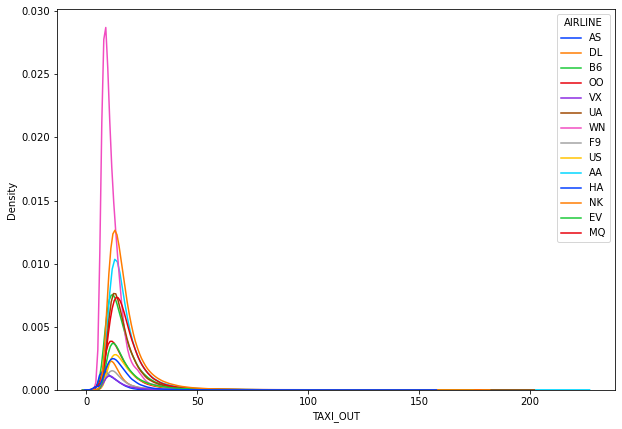

In [29]:
plt.figure(figsize=(10,7))
sns.kdeplot(flights.TAXI_OUT, hue=flights.OP_CARRIER, palette='bright')

<AxesSubplot:xlabel='TAXI_OUT', ylabel='Density'>

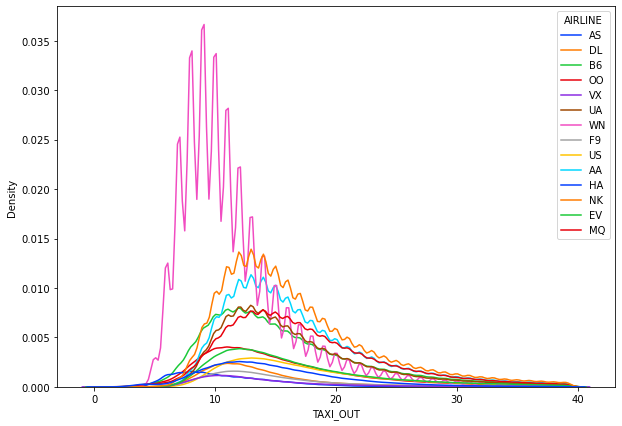

In [30]:
plt.figure(figsize=(10,7))
sns.kdeplot(flights[flights.TAXI_OUT < 40].TAXI_OUT, hue=flights.OP_CARRIER, palette='bright')

<AxesSubplot:xlabel='TAXI_OUT', ylabel='DEPARTURE_DELAY'>

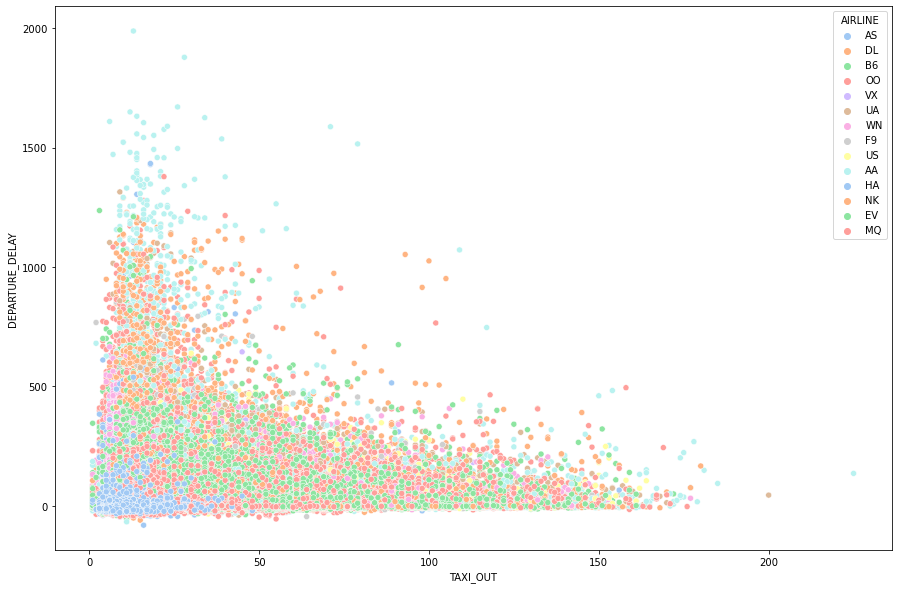

In [31]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=flights.TAXI_OUT, y=flights.DEP_DELAY, hue=flights.OP_CARRIER, palette='pastel')

<AxesSubplot:xlabel='TAXI_IN', ylabel='DEPARTURE_DELAY'>

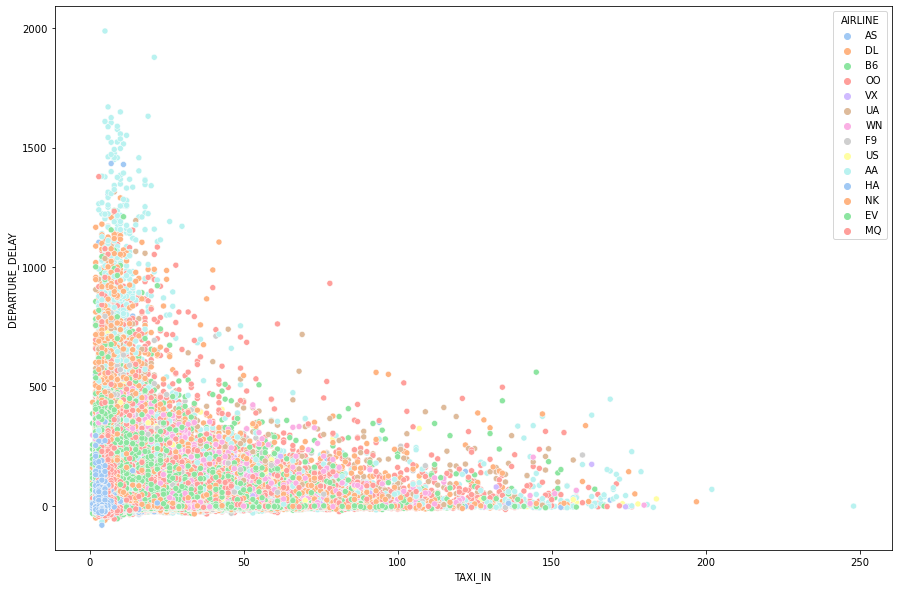

In [32]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=flights.TAXI_IN, y=flights.DEP_DELAY, hue=flights.OP_CARRIER, palette='pastel')

### Посмотрим на распределение задержек в зависимости от дня недели

In [26]:
df = flights.DAY_OF_WEEK.to_frame()
df['dep_plus'] = np.where(flights.DEP_DELAY>0,1,0)
df['dep_minus'] = np.where(flights.DEP_DELAY<0,1,0)
df['arr_plus'] = np.where(flights.ARR_DELAY>0,1,0)
df['arr_minus'] = np.where(flights.ARR_DELAY<0,1,0)

In [27]:
dff = df.groupby('DAY_OF_WEEK').dep_plus.mean().round(2) # среднее число задержек в каждом месяце
dff.index = dff.index.map(day)
trace1 = go.Bar(
    x=dff.index,
    y=dff.values,
    name = 'Departure delay > 0',
    marker = dict(
        color = 'green'
    )
)

dff = df.groupby('DAY_OF_WEEK').arr_plus.mean().round(2) # среднее число задержек в каждом месяце
dff.index = dff.index.map(day)
trace2 = go.Bar(
    x=dff.index,
    y=dff.values,
    name='Arrival delay > 0',
    marker=dict(
        color = 'orange'
    )
)

data = [trace1,trace2]
layout = go.Layout(
    title='% Delay (Days)', 
    yaxis = dict(title = '%')
)

fig = go.Figure(data=data, layout=layout)
fig.show()

In [28]:
dff = df.groupby('DAY_OF_WEEK').dep_minus.mean().round(2) # среднее число задержек в каждом месяце
dff.index = dff.index.map(day)
trace1 = go.Bar(
    x=dff.index,
    y=dff.values,
    name = 'Departure delay < 0',
    marker = dict(
        color = 'green'
    )
)

dff = df.groupby('DAY_OF_WEEK').arr_minus.mean().round(2) # среднее число задержек в каждом месяце
dff.index = dff.index.map(day)
trace2 = go.Bar(
    x=dff.index,
    y=dff.values,
    name='Arrival delay < 0',
    marker=dict(
        color = 'orange'
    )
)

data = [trace1,trace2]
layout = go.Layout(
    title='% Delay (Days)', 
    yaxis = dict(title = '%')
)

fig = go.Figure(data=data, layout=layout)
fig.show()

Явных тенденций для дня недели не замечано

### Посмотрим на распределение задержек в зависимости от авиалинии

<ipython-input-64-a63989f66e5c>:15: UserWarning:

FixedFormatter should only be used together with FixedLocator



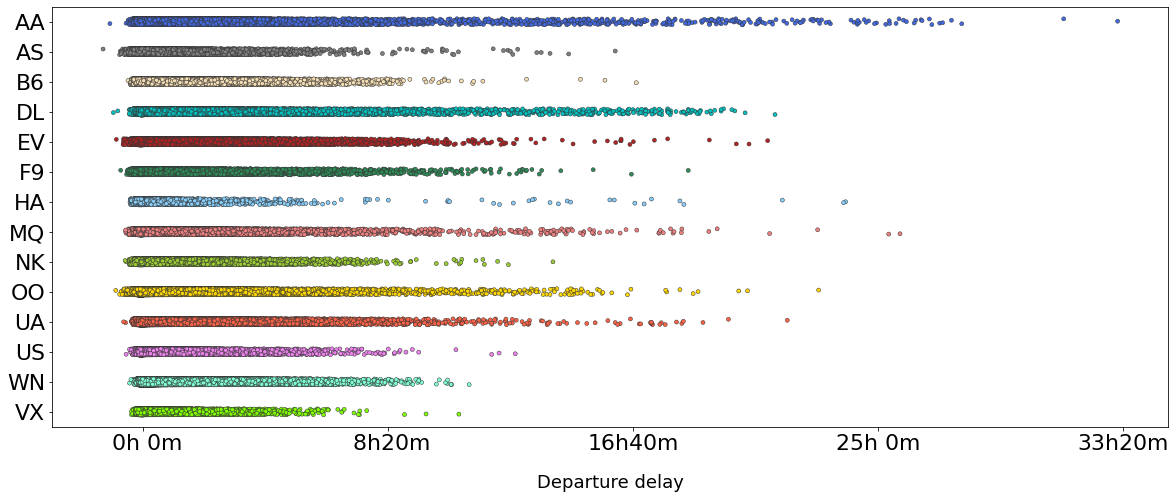

In [64]:
fig = plt.figure(figsize=(20,17))

df = flights.loc[:, ['OP_CARRIER', 'DEP_DELAY']]
colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse']
abbr_companies = airlines.set_index('IATA_CODE')['AIRLINE'].to_dict()
#df['OP_CARRIER'] = df['OP_CARRIER'].replace(abbr_companies)

ax1 = fig.add_subplot(211)
ax1 = sns.stripplot(y="OP_CARRIER", x="DEP_DELAY", size = 4, palette = colors,
                    data=df, linewidth = 0.5,  jitter=True)

plt.setp(ax1.get_xticklabels(), fontsize=22)
plt.setp(ax1.get_yticklabels(), fontsize=22)
ax1.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in ax1.get_xticks()])
plt.xlabel('Departure delay', fontsize=18, labelpad=20)
ax1.yaxis.label.set_visible(False)

<ipython-input-61-6870a7811452>:11: UserWarning:

FixedFormatter should only be used together with FixedLocator



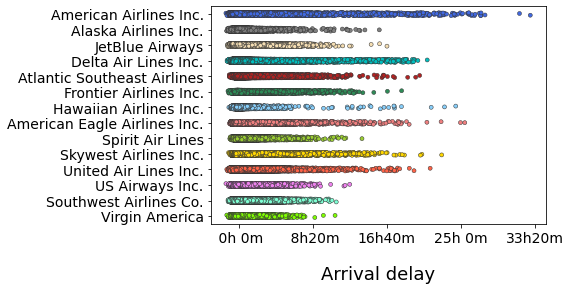

In [61]:
df = flights.loc[:, ['OP_CARRIER', 'ARR_DELAY']]

df['OP_CARRIER'] = df['OP_CARRIER'].replace(abbr_companies)

ax2 = fig.add_subplot(212)
ax2 = sns.stripplot(y="OP_CARRIER", x="ARR_DELAY", size = 4, palette = colors,
                    data=df, linewidth = 0.5,  jitter=True)

plt.setp(ax2.get_xticklabels(), fontsize=14)
plt.setp(ax2.get_yticklabels(), fontsize=14)
ax2.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in ax2.get_xticks()])
plt.xlabel('Arrival delay', fontsize=18, labelpad=20)
ax2.yaxis.label.set_visible(False)

Видим, что задержка некоторых рейсов явно выбивается из общей массы. В дальнейшем придётся отловить эти аномалии

### Посмотрим на зависимость задержки прилёта от задержки вылета в зависимости от авиалинии

[Text(0.5, 0, 'Задержка вылета в минутах'),
 Text(0, 0.5, 'Задержка прилёта в минутах')]

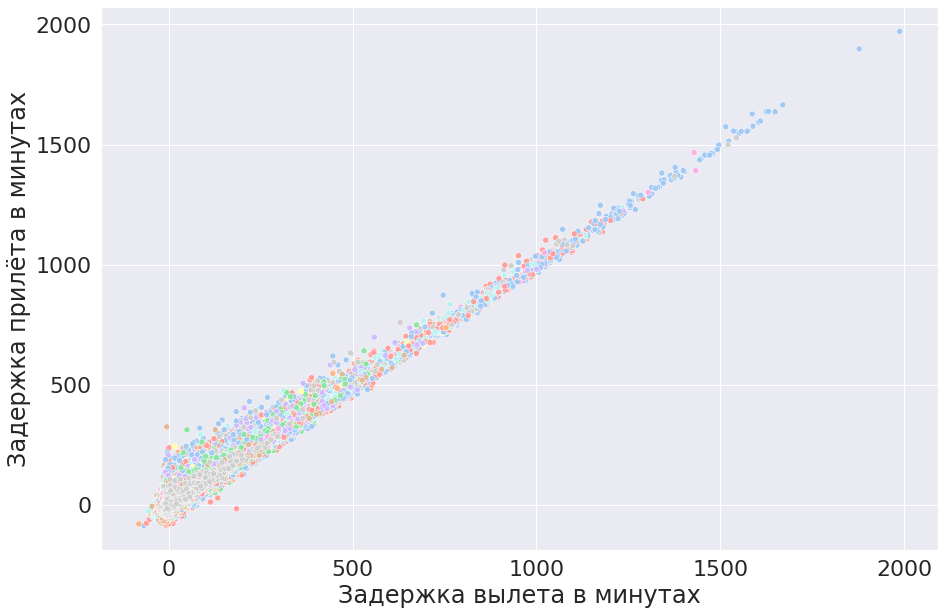

In [9]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 2)
grf = sns.scatterplot(x=flights.DEP_DELAY, y=flights.ARR_DELAY, hue=flights.OP_CARRIER,
                      palette='pastel', legend= False)
grf.set(xlabel='Задержка вылета в минутах', ylabel='Задержка прилёта в минутах')

Очевидно, что на задержку прилёта крайне сильно влияет задержка отправления. Поэтому главной целью будет стоять именно прогнозирование DEPARTURE_DELAY

### Попробуем определить среднюю задержку по авиалиниям

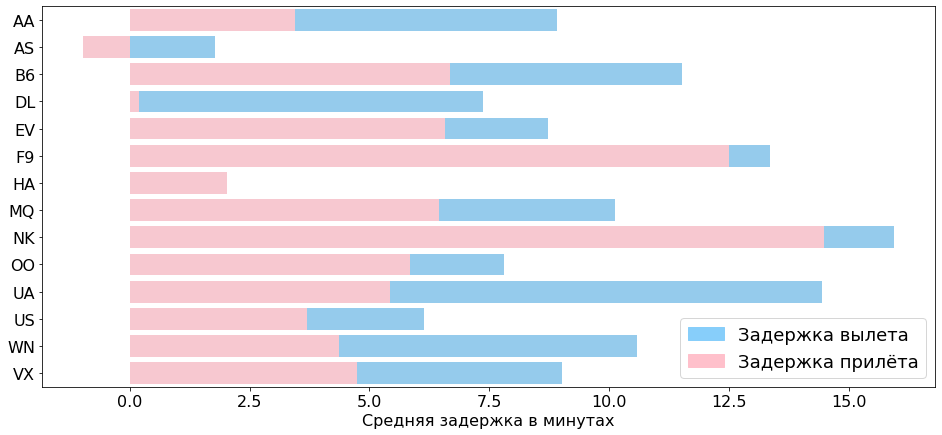

In [78]:
fig = plt.figure(figsize=(16,7))
ax = sns.barplot(x="DEP_DELAY", y="OP_CARRIER", data=flights, color="lightskyblue", ci=None)
ax = sns.barplot(x="ARR_DELAY", y="OP_CARRIER", data=flights, color="pink", ci=None)
labels = [abbr_companies[item.get_text()] for item in ax.get_yticklabels()]
#ax.set_yticklabels(labels)
ax.yaxis.label.set_visible(False)
#plt.title('Mean delay [min]', fontsize=14)
plt.ylabel('p', fontsize=18)
plt.xlabel('Средняя задержка в минутах', fontsize=16)
plt.setp(ax.get_yticklabels(), fontsize=16)
plt.setp(ax.get_xticklabels(), fontsize=16)

# Plot the legend
legend_labels = ['Задержка вылета', 'Задержка прилёта']

import matplotlib
legend_patches = [matplotlib.patches.Patch(color=C, label=L) for C, L in zip(['lightskyblue','pink'], legend_labels)]

plt.legend(handles=legend_patches, fontsize=18)

Нужно обратить внимание на Гавайские авиалинии. У них единственных средняя задержка прилёта больше, чем задержка отправления

### Попробуем добавить новый признак

In [91]:
flights['SPEED'] = 60*flights['DISTANCE']/flights['AIR_TIME'] # miles per hour

In [92]:
df = airlines.copy()
df.index = df.IATA_CODE
df.drop('IATA_CODE', axis=1, inplace=True)
airlines_id = df.to_dict()

In [93]:
dff = flights.groupby('OP_CARRIER').SPEED.mean().to_frame().sort_values(by='SPEED', ascending=False).round(2)

trace = go.Scatter(
    x=dff.index.map(airlines_id['AIRLINE']),
    y=dff.SPEED,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 30,
        color = dff.SPEED.values,
        colorscale='Jet',
        showscale=True
    )
)

data = [trace]
layout = go.Layout(xaxis=dict(tickangle=-20),
    title='Mean Speed by Airlines', 
                   yaxis = dict(title = 'Speed')
)

fig = go.Figure(data=data, layout=layout)
fig.show()

### Посмотрим на зависимость задержки прилёта от скрорости в зависимости от авиалинии

<AxesSubplot:xlabel='SPEED', ylabel='ARR_DELAY'>

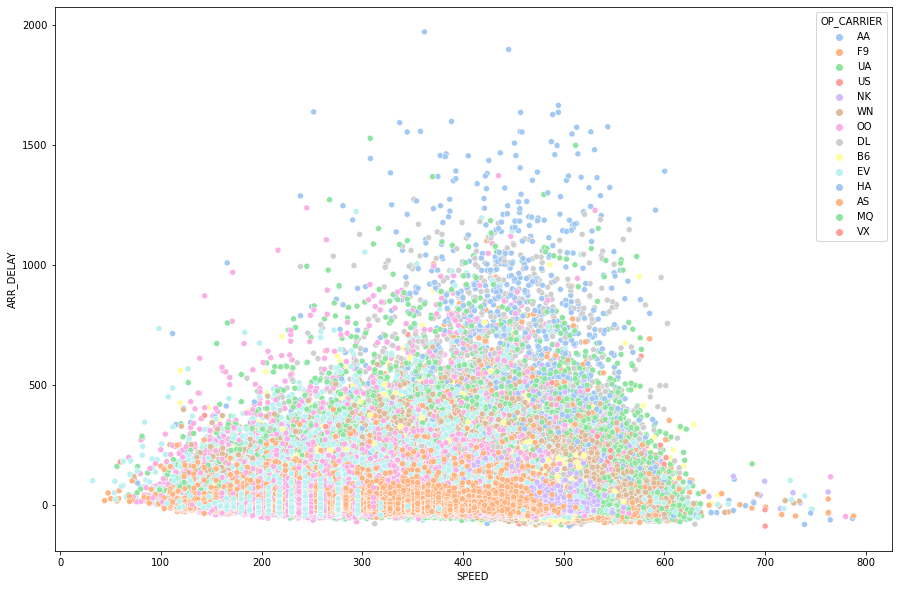

In [38]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=flights.SPEED, y=flights.ARR_DELAY, hue=flights.OP_CARRIER, palette='pastel')

### Матрица корреляций

Для определения линейной зависимости между переменными воспользуемся вычислением корреляционной матрицы

In [23]:
flights.head()

YEAR  MONTH  DAY_OF_MONTH  DAY_OF_WEEK OP_CARRIER TAIL_NUM  \
0  2015      4            23            4         AA   N3FJAA   
1  2015      4            24            5         AA   N3BAAA   
2  2015      4            25            6         AA   N3CUAA   
3  2015      4            26            7         AA   N3HKAA   
4  2015      4            27            1         AA   N3DMAA   

   OP_CARRIER_FL_NUM ORIGIN ORIGIN_CITY_NAME DEST DEST_CITY_NAME  \
0                165    ORD          Chicago  PHX        Phoenix   
1                165    ORD          Chicago  PHX        Phoenix   
2                165    ORD          Chicago  PHX        Phoenix   
3                165    ORD          Chicago  PHX        Phoenix   
4                165    ORD          Chicago  PHX        Phoenix   

   CRS_DEP_TIME  DEP_DELAY  DEP_DELAY_GROUP  TAXI_OUT  WHEELS_OFF  WHEELS_ON  \
0          1210       -8.0             -1.0      15.0      1217.0     1356.0   
1          1210        4.0              0.0      19.0      1233.0     1417.0   
2          1210       44.0              2.0      24.0      1318.0     1441.0   
3          1210       -5.0             -1.0      11.0      1216.0     1326.0   
4          1210        9.0              0.0      11.0      1230.0     1328.0   

   TAXI_IN  CRS_ARR_TIME  ARR_DELAY  ARR_DELAY_GROUP  CANCELLED  \
0      6.0          1414      -12.0             -1.0        0.0   
1     12.0          1414       15.0              1.0        0.0   
2      4.0          1414       31.0              2.0        0.0   
3      4.0          1414      -44.0             -2.0        0.0   
4     22.0          1414      -24.0             -2.0        0.0   

  CANCELLATION_CODE  DIVERTED  ACTUAL_ELAPSED_TIME  AIR_TIME  FLIGHTS  \
0               NaN       0.0                240.0     219.0      1.0   
1               NaN       0.0                255.0     224.0      1.0   
2               NaN       0.0                231.0     203.0      1.0   
3               NaN       0.0                205.0     190.0      1.0   
4               NaN       0.0                211.0     178.0      1.0   

   DISTANCE  CARRIER_DELAY  WEATHER_DELAY  NAS_DELAY  SECURITY_DELAY  \
0    1440.0            NaN            NaN        NaN             NaN   
1    1440.0            0.0            0.0       15.0             0.0   
2    1440.0           31.0            0.0        0.0             0.0   
3    1440.0            NaN            NaN        NaN             NaN   
4    1440.0            NaN            NaN        NaN             NaN   

   LATE_AIRCRAFT_DELAY  FIRST_DEP_TIME  TOTAL_ADD_GTIME  LONGEST_ADD_GTIME  \
0                  NaN             NaN              NaN                NaN   
1                  0.0             NaN              NaN                NaN   
2                  0.0             NaN              NaN                NaN   
3                  NaN             NaN              NaN                NaN   
4                  NaN             NaN              NaN                NaN   

        SPEED  
0  394.520548  
1  385.714286  
2  425.615764  
3  454.736842  
4  485.393258

In [105]:
correlation = flights[['DAY_OF_WEEK','MONTH','ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'WHEELS_OFF', 'TAXI_IN', 'TAXI_OUT', 'CRS_ARR_TIME', 'CRS_DEP_TIME',
       'ARR_DELAY', 'DEP_DELAY', 'SPEED']].fillna(0).corr()
cols = correlation.columns.values
corr  = correlation.values

trace = go.Heatmap(z = corr,
                   x = cols,
                   y = cols,
                   colorscale = "YlOrRd",reversescale = False)

data = [trace]
layout = go.Layout(dict(title = "Матрица корреляций",
                        #autosize = True,
                        height  = 900,
                        width   = 900,
                        #margin  = dict(l = 100),
                        yaxis   = dict(tickfont = dict(size = 16)),
                        xaxis   = dict(tickfont = dict(size = 16))
                       )
                  )

fig = go.Figure(data=data,layout=layout)

fig.show()

Будем рассматривать в качестве целевых переменных DEPARURE_DELAY и ARRIVAL_DELAY. Такие признаки как день недели и месяц практически не оказывают влияния на другие переменные. Также присутствует сильная корреляция между целевыми переменными.

In [25]:
# Find all correlations and sort 
corr = flights.fillna(0).corr()['DEP_DELAY'].sort_values()
print(corr)

CANCELLED             -0.023287
MONTH                 -0.020067
DAY_OF_WEEK           -0.010716
OP_CARRIER_FL_NUM     -0.009709
DAY_OF_MONTH          -0.000062
TAXI_IN                0.015556
DIVERTED               0.023144
DISTANCE               0.024948
AIR_TIME               0.025444
SECURITY_DELAY         0.028111
SPEED                  0.030489
ACTUAL_ELAPSED_TIME    0.032739
WHEELS_ON              0.061151
TAXI_OUT               0.062196
CRS_ARR_TIME           0.096520
CRS_DEP_TIME           0.108885
WHEELS_OFF             0.161309
FIRST_DEP_TIME         0.220064
LONGEST_ADD_GTIME      0.223436
TOTAL_ADD_GTIME        0.224840
WEATHER_DELAY          0.263586
NAS_DELAY              0.302904
LATE_AIRCRAFT_DELAY    0.647455
CARRIER_DELAY          0.653688
ARR_DELAY_GROUP        0.851603
DEP_DELAY_GROUP        0.919746
ARR_DELAY              0.937890
DEP_DELAY              1.000000
YEAR                        NaN
FLIGHTS                     NaN
Name: DEP_DELAY, dtype: float64


In [26]:
corr = flights.fillna(0).corr()['ARR_DELAY'].sort_values()
print(corr)

SPEED                 -0.048150
MONTH                 -0.035598
DISTANCE              -0.024862
DAY_OF_WEEK           -0.016527
CANCELLED             -0.013927
DIVERTED              -0.005688
AIR_TIME              -0.003839
DAY_OF_MONTH          -0.003027
OP_CARRIER_FL_NUM      0.017675
SECURITY_DELAY         0.028102
ACTUAL_ELAPSED_TIME    0.031891
WHEELS_ON              0.060082
CRS_ARR_TIME           0.087826
CRS_DEP_TIME           0.099093
TAXI_IN                0.116712
WHEELS_OFF             0.151805
FIRST_DEP_TIME         0.198701
TOTAL_ADD_GTIME        0.201597
LONGEST_ADD_GTIME      0.201605
TAXI_OUT               0.224131
WEATHER_DELAY          0.270182
NAS_DELAY              0.424613
LATE_AIRCRAFT_DELAY    0.623086
CARRIER_DELAY          0.627597
DEP_DELAY_GROUP        0.866265
ARR_DELAY_GROUP        0.930141
DEP_DELAY              0.937890
ARR_DELAY              1.000000
YEAR                        NaN
FLIGHTS                     NaN
Name: ARR_DELAY, dtype: float64


## Приступим к очистке данных

In [27]:
missing_values_table(flights)

Your selected dataframe has 37 columns.
There are 21 columns that have missing values.


Missing Values  % of Total Values
LONGEST_ADD_GTIME           5782342               99.4
TOTAL_ADD_GTIME             5782342               99.4
FIRST_DEP_TIME              5782342               99.4
CANCELLATION_CODE           5729195               98.5
LATE_AIRCRAFT_DELAY         4755640               81.7
SECURITY_DELAY              4755640               81.7
NAS_DELAY                   4755640               81.7
WEATHER_DELAY               4755640               81.7
CARRIER_DELAY               4755640               81.7
ACTUAL_ELAPSED_TIME          105071                1.8
AIR_TIME                     105071                1.8
SPEED                        105071                1.8
ARR_DELAY_GROUP              105071                1.8
ARR_DELAY                    105071                1.8
TAXI_IN                       92513                1.6
WHEELS_ON                     92513                1.6
WHEELS_OFF                    89047                1.5
TAXI_OUT                      89047                1.5
DEP_DELAY                     86153                1.5
DEP_DELAY_GROUP               86153                1.5
TAIL_NUM                      14721                0.3

Порог, после которого колонки лучше выкидывать, зависит от задачи. В нашем проекте мы будем удалять колонки, пустые более чем на половину.

In [28]:
# Get the columns with > 50% missing
missing_df = missing_values_table(flights);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 37 columns.
There are 21 columns that have missing values.
We will remove 9 columns.


In [29]:
flights = flights.drop(columns = list(missing_columns))

Выкинем YEAR, поскольку он везде 2015

In [30]:
flights.drop('YEAR', axis=1, inplace=True)
#flights.drop('DIVERTED', axis=1, inplace=True)
#flights.drop('CANCELLED', axis=1, inplace=True)

Оставшиеся пустые значения удалим

In [31]:
##flights.fillna(0, inplace=True)
flights.dropna(inplace=True)

In [32]:
missing_values_table(flights)

Your selected dataframe has 27 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

In [33]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5714008 entries, 0 to 5819078
Data columns (total 27 columns):
 #   Column               Dtype  
---  ------               -----  
 0   MONTH                int64  
 1   DAY_OF_MONTH         int64  
 2   DAY_OF_WEEK          int64  
 3   OP_CARRIER           object 
 4   TAIL_NUM             object 
 5   OP_CARRIER_FL_NUM    int64  
 6   ORIGIN               object 
 7   ORIGIN_CITY_NAME     object 
 8   DEST                 object 
 9   DEST_CITY_NAME       object 
 10  CRS_DEP_TIME         int64  
 11  DEP_DELAY            float64
 12  DEP_DELAY_GROUP      float64
 13  TAXI_OUT             float64
 14  WHEELS_OFF           float64
 15  WHEELS_ON            float64
 16  TAXI_IN              float64
 17  CRS_ARR_TIME         int64  
 18  ARR_DELAY            float64
 19  ARR_DELAY_GROUP      float64
 20  CANCELLED            float64
 21  DIVERTED             float64
 22  ACTUAL_ELAPSED_TIME  float64
 23  AIR_TIME             float64
 24

<AxesSubplot:xlabel='SPEED', ylabel='Count'>

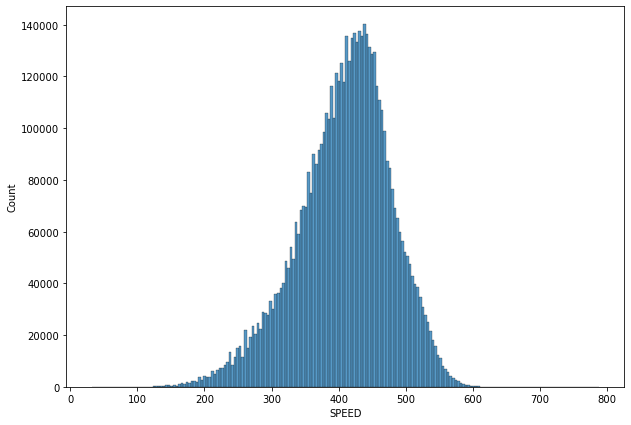

In [34]:
plt.figure(figsize=(10,7))
sns.histplot(flights.SPEED, bins=200)

Также на этом этапе лучше удалить аномальные значения. Возможен вариант, когда удаляют значения выше третьего квартиля и ниже первого квартиля. Но для нашего случая это слишком узкий порог. Попробуем отловить несколько наибольших задержек у каждой авиалинии и убрать их.

In [35]:
def remove_anomaly(df):
    for i in airlines.IATA_CODE:
        df = df.drop(index=df[df.AIRLINE == i].sort_values(by='DEPARTURE_DELAY', ascending=False)[:10].index)
        df = df.drop(index=df[df.AIRLINE == i].sort_values(by='ARRIVAL_DELAY', ascending=False)[:10].index)
    
    return df

In [54]:
#flights = remove_anomaly(flights)

Проверим как сработала процедура удаления аномалий

In [55]:
%%script False
fig = plt.figure(figsize=(16,15))

df = flights.loc[:, ['AIRLINE', 'DEPARTURE_DELAY']]
colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse']
abbr_companies = airlines.set_index('IATA_CODE')['AIRLINE'].to_dict()
df['AIRLINE'] = df['AIRLINE'].replace(abbr_companies)

ax1 = fig.add_subplot(211)
ax1 = sns.stripplot(y="AIRLINE", x="DEPARTURE_DELAY", size = 4, palette = colors,
                    data=df, linewidth = 0.5,  jitter=True)

plt.setp(ax1.get_xticklabels(), fontsize=14)
plt.setp(ax1.get_yticklabels(), fontsize=14)
ax1.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in ax1.get_xticks()])
plt.xlabel('Departure delay', fontsize=18, labelpad=20)
ax1.yaxis.label.set_visible(False)

Couldn't find program: 'False'


### Конструирование и выбор признаков. 

In [58]:
flights.to_csv('flights_correct_nominal.csv', index=False)

Закодируем категориальные признаки числом их вхождений. Можно попробовать хэширование.

In [36]:
MOD = 1000000
flights['OP_CARRIER'] = flights['OP_CARRIER'].map(lambda x: hash(x) % MOD)
flights['TAIL_NUM'] = flights['TAIL_NUM'].map(lambda x: hash(x) % MOD)
flights['ORIGIN_CITY_NAME'] = flights['ORIGIN_CITY_NAME'].map(lambda x: hash(x) % MOD)
flights['DEST_CITY_NAME'] = flights['DEST_CITY_NAME'].map(lambda x: hash(x) % MOD)
flights['ORIGIN'] = flights['ORIGIN'].map(lambda x: hash(x) % MOD)
flights['DEST'] = flights['DEST'].map(lambda x: hash(x) % MOD)

In [37]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5714008 entries, 0 to 5819078
Data columns (total 27 columns):
 #   Column               Dtype  
---  ------               -----  
 0   MONTH                int64  
 1   DAY_OF_MONTH         int64  
 2   DAY_OF_WEEK          int64  
 3   OP_CARRIER           int64  
 4   TAIL_NUM             int64  
 5   OP_CARRIER_FL_NUM    int64  
 6   ORIGIN               int64  
 7   ORIGIN_CITY_NAME     int64  
 8   DEST                 int64  
 9   DEST_CITY_NAME       int64  
 10  CRS_DEP_TIME         int64  
 11  DEP_DELAY            float64
 12  DEP_DELAY_GROUP      float64
 13  TAXI_OUT             float64
 14  WHEELS_OFF           float64
 15  WHEELS_ON            float64
 16  TAXI_IN              float64
 17  CRS_ARR_TIME         int64  
 18  ARR_DELAY            float64
 19  ARR_DELAY_GROUP      float64
 20  CANCELLED            float64
 21  DIVERTED             float64
 22  ACTUAL_ELAPSED_TIME  float64
 23  AIR_TIME             float64
 24

In [61]:
flights.to_csv('flights_correct_numeric.csv', index=False)

Посмотрим на корреляционную матрицу

In [38]:
correlation = flights[flights.columns].drop(columns=['CANCELLED', 'DIVERTED', 'FLIGHTS']).corr()
cols = correlation.columns.values
corr  = correlation.values

trace = go.Heatmap(z = corr,
                   x = cols,
                   y = cols,
                   colorscale = "YlOrRd",reversescale = False)

data = [trace]
layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = True,
                        height  = 600,
                        width   = 800,
                        margin  = dict(l = 200),
                        yaxis   = dict(tickfont = dict(size = 8)),
                        xaxis   = dict(tickfont = dict(size = 8))
                       )
                  )

fig = go.Figure(data=data,layout=layout)
fig.show()

Для поиска и удаления коллинеарных признаков воспользуемся коэффициентом В-корреляции (thebcorrelation coefficient). Отбросим одну пару признаков, если коэффициент корреляции между ними больше 0,6.

In [39]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Energy Star Score
    y = x['DEP_DELAY']
    x = x.drop(columns = ['DEP_DELAY'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    
    # Add the score back in to the data
    x['DEP_DELAY'] = y
               
    return x

In [40]:
features = remove_collinear_features(flights, 0.6);

In [41]:
correlation = features[features.columns].drop(columns=['CANCELLED', 'DIVERTED', 'FLIGHTS']).corr()
cols = correlation.columns.values
corr  = correlation.values

trace = go.Heatmap(z = corr,
                   x = cols,
                   y = cols,
                   colorscale = "YlOrRd",reversescale = False)

data = [trace]
layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = True,
                        height  = 600,
                        width   = 800,
                        margin  = dict(l = 200),
                        yaxis   = dict(tickfont = dict(size = 8)),
                        xaxis   = dict(tickfont = dict(size = 8))
                       )
                  )

fig = go.Figure(data=data,layout=layout)
fig.show()

In [66]:
features.to_csv('features.csv', index=False)
flights.to_csv('flights_numeric.csv', index=False)

In [42]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5714008 entries, 0 to 5819078
Data columns (total 20 columns):
 #   Column               Dtype  
---  ------               -----  
 0   MONTH                int64  
 1   DAY_OF_MONTH         int64  
 2   DAY_OF_WEEK          int64  
 3   OP_CARRIER           int64  
 4   TAIL_NUM             int64  
 5   OP_CARRIER_FL_NUM    int64  
 6   ORIGIN               int64  
 7   ORIGIN_CITY_NAME     int64  
 8   DEST                 int64  
 9   DEST_CITY_NAME       int64  
 10  CRS_DEP_TIME         int64  
 11  DEP_DELAY_GROUP      float64
 12  TAXI_OUT             float64
 13  TAXI_IN              float64
 14  CANCELLED            float64
 15  DIVERTED             float64
 16  ACTUAL_ELAPSED_TIME  float64
 17  AIR_TIME             float64
 18  FLIGHTS              float64
 19  DEP_DELAY            float64
dtypes: float64(9), int64(11)
memory usage: 915.5 MB


## Анализ результатов

Обнаружена линейная зависимость ARRIVAL_DELAY от DEPARTURE_DELAY. Поэтому задача прогнозирования последнего становится приоритетной. Значительных корреляций между признаками и целевой переменной DEPARTURE_DELAY не выявленно, но у некоторых авиакомпаний прослеживается стабильность в хорошем смысле по отношению к задержке вылета. Традиционна в зимнее время много задержек и отмен из-за плохой погоды.

На основании полученных данных постараемся решить следующие задачи:
1) Прогнозирование DEPARTURE_DELAY

2) Выявление закономерностей, позволяющи определить тип задержки вылета (стандартная: от -20 до 50 минут, или значительная: более 50 минут)

3) При успешном выполнении пункта 2 построить разные модели, позволяющие определить вероятноть того, будет ли задержка аномальной. Иначе, воспользоваться регрессионной моделью для прогноза

4) Выявление закономерностей, позволяющих определить вероятность отмены рейса

5) При успешном выполнении пункта 3, попытаться предсказать ARRIVAL_DELAY на основе спрогнозированного DEPARTYRE_DELAY